In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f1(x1,x2,t):
    return 9*x1 + 24*x2 + 5*np.cos(t) - (1/3)*np.sin(t)

def f2(x1,x2,t):
    return -24*x1 - 51*x2 - 9*np.cos(t) + (1/3)*np.sin(t)

def f(x,t):
    (x1, x2) = x
    return np.array([f1(x1,x2,t),f2(x1,x2,t)])

def true_x1(t):
    return 2*np.exp(-3*t) - np.exp(-39*t) + (1/3)*np.cos(t)

def true_x2(t):
    return -np.exp(-3*t) + 2*np.exp(-39*t) - (1/3)*np.cos(t)

def true_f(t):
    return np.array([true_x1(t),true_x2(t)])

In [5]:
def runge_kutta(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        t = t0 + h*i
        k1 = f(y[i-1], t)
        k2 = f(y[i-1] + k1*(h/2), t + h/2)
        k3 = f(y[i-1] + k2*(h/2), t + h/2)
        k4 = f(y[i-1] + k3*h, t + h)
        y[i] = y[i-1] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

In [9]:
def adams_bashforth(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    y[1] = y0 + h*f(y0, t0)
    y[2] = y[1] + h*f(y[1], t0 + h)
    ts = [t0, t0 + h, t0 + 2*h]
    for i in range(3, n):
        ts.append(t0 + h*i)
        y[i] = y[i-1] + (h/12)*(23*f(y[i-1], ts[i-1]) - 16*f(y[i-2], ts[i-2]) + 5*f(y[i-3], ts[i-3]))
    return y

In [13]:
def implicit_euler(f, y0, t0, T, h):
    n = int((T - t0) / h)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(1, n):
        t = t0 + h*i
        y[i] = y[i-1] + h*f(y[i], t)
    return y

In [14]:
h = [1/10, 1/14]
h = h + [1/(2**k * 15) for k in range(0,5)]
errors_runge_kutta = []
errors_adams_bashforth = []
errors_implicit_euler = []
for i in range(len(h)):
    y = runge_kutta(f, [4/3,2/3], 0, 20, h[i])
    errors_runge_kutta.append(np.abs(y[-1][1] - true_x2(20)))
    errors_adams_bashforth.append(np.abs(adams_bashforth(f, [4/3,2/3], 0, 20, h[i])[-1][1] - true_x2(20)))
    errors_implicit_euler.append(np.abs(implicit_euler(f, [4/3,2/3], 0, 20, h[i])[-1][1] - true_x2(20)))
print(errors_runge_kutta)
print(errors_adams_bashforth)
print(errors_implicit_euler)
    

[2.996376228455167e+129, 2.389538140252786, 0.0004446324043773653, 3.533357504803547e-06, 1.5937288577738684e-07, 8.504624476879385e-09, 4.90125884322623e-10]
[3.094212788350935e+170, 1.4528018674490836e+197, 1.1837330514205628e+202, 4.459640768551589e+219, 2.0101439753438317e+83, 0.002531200731974048, 0.0012667943366324874]
[6.591402301137256, 6.771368032494476, 6.801256179547931, 7.009624332948761, 7.113251430423835, 7.164925751277046, 7.190728105790026]


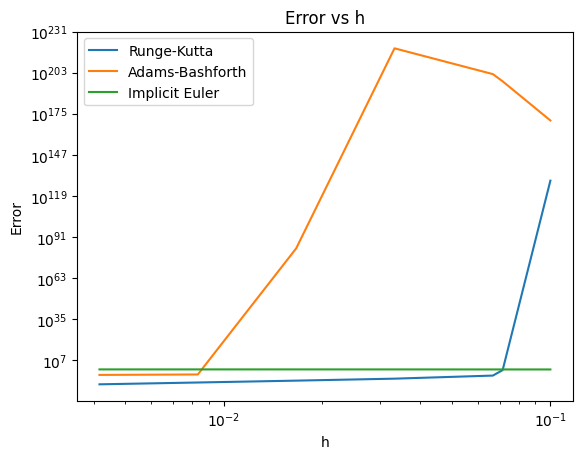

In [16]:
#do a logarithmic graph h vs errors
plt.plot(h, errors_runge_kutta, label='Runge-Kutta')
plt.plot(h, errors_adams_bashforth, label='Adams-Bashforth')
plt.plot(h, errors_implicit_euler, label='Implicit Euler')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.title('Error vs h')
plt.legend()
plt.show()